In [1]:
import pandas as pd

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [2]:
df1=pd.read_csv('fifa_stats.csv')

In [72]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


# 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

### 1.A a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [6]:
import numpy as np
sampleMeans = []
for _ in range(1000):
    samples = df1['Age'].sample(n=200)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)

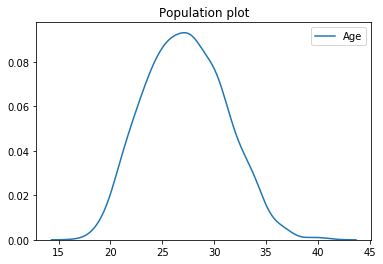

In [27]:
sns.kdeplot(df1['Age'])
plt.title('Population plot')
plt.show()

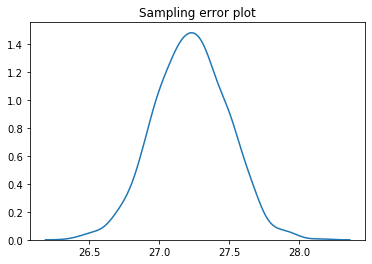

In [28]:
sns.kdeplot(sampleMeans)
plt.title('Sampling error plot')
plt.show()

In [24]:
popmean=df1['Age'].mean()
sampmean=np.mean(sampleMeans)
print('population mean is',popmean)
print('sample mean is',sampmean)
popsd=df1['Age'].std()
sampstd=popsd/np.sqrt(200)
print('populatin standard deviation is',popsd)
print('sample standard error is',sampstd)
#We can see mean of population is almost same as mean of sample. The distribution plot of sample means is much more improved.
#Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the
#sample means cluster more and more around the true population mean.

population mean is 27.2315
sample mean is 27.22767
populatin standard deviation is 3.8590612753574423
sample standard error is 0.2728768396819654


### 1.B Is there any evidence that the players overall rating is greater than 80?

In [30]:
df1['Overall_rating']

0       94
1       94
2       92
3       91
4       91
        ..
1995    75
1996    75
1997    75
1998    75
1999    75
Name: Overall_rating, Length: 2000, dtype: int64

In [34]:
#normality check
#null hypo=data is normal
#alternate hypo= data not normal
s,p_val1=shapiro(df1['Overall_rating'])
print(p_val1)
#p value<0.05 so null hypothesis is false so we apply non parametric test. That is wilcoxon

1.0221183102662362e-39


In [37]:
#null hypo:median of rating<=80
#alternate hypo: median of rating>80
stats.wilcoxon(df1['Overall_rating']-80,alternative='greater')
# since p_value>0.05 we fail to reject null. hence ratings not greater than 80

WilcoxonResult(statistic=340568.5, pvalue=1.0)

###    1.C Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [39]:
right=df1[df1['Preferred Foot']=='Right']['Potential']
left=df1[df1['Preferred Foot']=='Left']['Potential']

In [40]:
##normality check
#null hypo=data is normal
#alternate hypo= data not normal
s,p_val1=shapiro(df1['Potential'])
print(p_val1)
#p value<0.05 so null hypothesis is false so we apply non parametric test. That is mannwhitneyu because the 2 samples are unpaired

5.016414837142018e-28


In [43]:
#null hypo: preferred foot has no impact on potential
#atrenate hypo: preferred foot has impact on potential
s,p_val=stats.mannwhitneyu(right,left,alternative='two-sided')
p_val
# p value>0.05 so we fail to reject null. Hence preferred foot has no impact on the potential

0.223624812417334

### 1.D Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [45]:
##normality check
#null hypo=data is normal
#alternate hypo= data not normal
s,p_val1=shapiro(df1['Potential'])
print(p_val1)
s,p_val2=shapiro(df1['Overall_rating'])
print(p_val2)
#p value for both <0.05 so null hypothesis is false so we apply non parametric test. That is mannwhitneyu because the 2 samples are unpaired

5.016414837142018e-28
1.0221183102662362e-39


In [46]:
#null hypo: overall rating has no impact on potential
#atrenate hypo: overall rating foot has impact on potential
s,p_val=stats.mannwhitneyu(df1['Potential'],df1['Overall_rating'],alternative='two-sided')
p_val
#Since p value is <0.05 so we reject null and conclude that overall rating affects the potential of the player

3.203578185414717e-67

### 1.E Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [51]:
df1['Skill Moves'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [52]:
##normality check
#null hypo=data is normal
#alternate hypo= data not normal
s,p_val2=shapiro(df1['Overall_rating'])
print(p_val2)
#p value<0.05 so null hypothesis is false so we apply non parametric test. So we perform kruskal test sice there are 5 categories.


1.0221183102662362e-39


In [55]:
one=df1[df1['Skill Moves']==1]['Overall_rating']
two=df1[df1['Skill Moves']==2]['Overall_rating']
three=df1[df1['Skill Moves']==3]['Overall_rating']
four=df1[df1['Skill Moves']==4]['Overall_rating']
five=df1[df1['Skill Moves']==5]['Overall_rating']

In [58]:
# null hypo: mean ranks of the categories are all same. No diffetence
# alternate hypo: mean ranks of the categories are not all same. There is diffetence
stats.kruskal(one,two,three,four,five)
# P val< 0.05 so the null hypothesis is rejected. Skill moves have effect on the overall rating

KruskalResult(statistic=104.85780927711181, pvalue=9.082225777036205e-22)

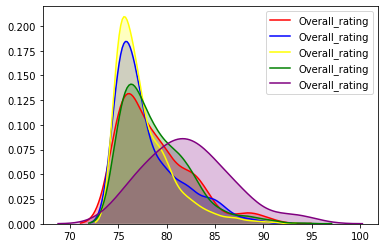

In [69]:
sns.kdeplot(one,shade=True,color='red')
sns.kdeplot(two,shade=True,color='blue')
sns.kdeplot(three,shade=True,color='yellow')
sns.kdeplot(four,shade=True,color='green')
sns.kdeplot(five,shade=True,color='purple')
plt.show()
#As we can see the 5 skill moves do make a difference

# 2 Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

In [82]:
df2=pd.read_csv('phone.csv')
df2.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


### 2.A With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [94]:
pop_mean=df3['duration'].mean()
pop_std=df3['duration'].std()
print('For 95% confidence level :',stats.norm.interval(0.95,loc=pop_mean,scale=pop_std/np.sqrt(820)))
print('For 99% confidence level :',stats.norm.interval(0.99,loc=pop_mean,scale=pop_std/np.sqrt(820)))
# The interval of 99% is more than 95% which means it has more
#share of data and that the probability of finding the values is more in 99% interval

For 95% confidence level : (141.4970509488023, 147.8267963174542)
For 99% confidence level : (140.5025758764391, 148.8212713898174)


### 2.B Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [88]:
df2['network_type'].unique()

array(['data', 'mobile', 'voicemail', 'landline'], dtype=object)

In [95]:
df3=df2[(df2['network']!='data') & (df2['network']!='voicemail') & (df2['network']!='landline') ]
#Because they are network types so incorrect data entry

In [96]:
# Data is chategorical so we perform chisquare goodness of fit test
df3['network'].value_counts()

Three       215
Vodafone    215
Meteor       87
Tesco        84
Name: network, dtype: int64

In [100]:
exp=[150,150,150,150]
obs=[215,215,87,84]

In [101]:
#null hypo: obs = exp
#alternate hypo : obs != exp
stats.chisquare(f_obs=obs,f_exp=exp)
# P value < 0.05. Meaning not equally distributed in data set

Power_divergenceResult(statistic=111.83333333333334, pvalue=4.4234236034796116e-24)

### 2.C Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

In [102]:
three=df3[df3['network']=='Three']['duration']
voda=df3[df3['network']=='Vodafone']['duration']
meteor=df3[df3['network']=='Meteor']['duration']
tesco=df3[df3['network']=='Tesco']['duration']

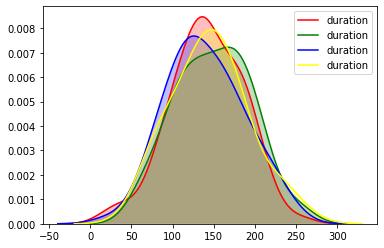

In [104]:
sns.kdeplot(three,shade=True,color='red')
sns.kdeplot(voda,shade=True,color='green')
sns.kdeplot(meteor,shade=True,color='blue')
sns.kdeplot(tesco,shade=True,color='yellow')
# The distribution of duration of every network is over lapping. So the the network has no effect on duration.

### 2.D Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.



In [107]:
df3['item'].unique()

array(['call', 'sms'], dtype=object)

In [108]:
##normality check
#null hypo=data is normal
#alternate hypo= data not normal
shapiro(df3['duration'])
# P value is greater than 0.05 so the data is normal

(0.9977515935897827, 0.608032763004303)

In [109]:
call=df3[df3['item']=='call']['duration']
sms=df3[df3['item']=='sms']['duration']
##equal variances check
#null hypo=all variances are same
#alternate hypo= atleast one variance is different
stats.levene(call,sms)
# p value > 0.05 so variances same so we can apply ttest

LeveneResult(statistic=0.6401288573212004, pvalue=0.4239813230172229)

In [112]:
# null hypo : duration is same for call and item
# alternate hypo : duration is not same for call and item
stats.ttest_ind(call,sms)
# p value >0.05 so we fail t reject null. duration is same for call and item

Ttest_indResult(statistic=1.5574355679951721, pvalue=0.11989526976627665)

### 2.E Perform statistical tests to identify the relation between network and network_type. 

In [116]:
# Chi square Test of independence
# null hypo : no association between network and network type
# alternate hypo : there is association between network and network type
cont_tab=pd.crosstab(df3['network'],df3['network_type'])

In [119]:
s,p_val,d,arr=stats.chi2_contingency(cont_tab)
print(p_val)
# P value > 0.05 so we fail to reject null. There is no association in network and network type

1.0
